In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import simps
%matplotlib inline

## 2.1 question 1

In [2]:
def character_frequencies(s):
    char_num_d = dict()
    
    for ch in s:
        ch1 = ch
        if (ch1 >= 'A' and ch1 <= 'Z'):
            ch1 = chr(ord(ch1) + 32)
        char_num_d[ch1] = char_num_d.get(ch1, 0) + 1
    
    item_list = list(char_num_d.items())
    item_list.sort(key = lambda x : (x[1], x[0]), reverse = True)
    
    alist = list()
    blist = list()
    for item in item_list:
        alist.append(item[0])
        blist.append(item[1])
    
    alist = tuple(alist)
    blist = tuple(blist)
    
    return (alist, blist)


print(character_frequencies('Wooloomooloo'))

s1 = '1: The quick brown fox jumps over the lazy dog. '
s2 = '2: Pack my box with five dozen liquor jugs. '
s3 = '3: Portez ce vieux whisky au juge blond qui fume. '
T=character_frequencies(s1+s2+s3)
for i,c in enumerate(T[0]):
    print((c,T[1][i]))

(('o', 'l', 'w', 'm'), (8, 2, 1, 1))
(' ', 29)
('e', 10)
('u', 9)
('o', 9)
('i', 7)
('t', 4)
('r', 4)
('h', 4)
('z', 3)
('y', 3)
('x', 3)
('w', 3)
('v', 3)
('s', 3)
('q', 3)
('p', 3)
('n', 3)
('m', 3)
('l', 3)
('k', 3)
('j', 3)
('g', 3)
('f', 3)
('d', 3)
('c', 3)
('b', 3)
('a', 3)
(':', 3)
('.', 3)
('3', 1)
('2', 1)
('1', 1)


## 2.2 question 2

In [3]:
def entropy(s0,s1,alphabet='abcdefghijklmnopqrstuvwxyz'):
    s0_item = character_frequencies(s0)
    s1_item = character_frequencies(s1)
    # print(s0_item)
    # print(s1_item)

    s0_d = dict()
    s1_d = dict()

    for i in range(len(s0_item[0])):
        key = s0_item[0][i]
        value = s0_item[1][i]
        s0_d[key] = value
    # print(s0_d)

    for i in range(len(s1_item[0])):
        key = s1_item[0][i]
        value = s1_item[1][i]
        s1_d[key] = value
    # print(s1_d)

    sum0 = 0
    sum1 = 0
    for ch in alphabet:
        sum0 += s0_d.get(ch, 0)
        sum1 += s1_d.get(ch, 0)

    relative_entropy = 0
    for ch in alphabet:
        f = s0_d.get(ch, 0) / sum0
        g = s1_d.get(ch, 0) / sum1
        if (f == 0):
            continue
        relative_entropy += f * np.log(f / g)

    return relative_entropy

s0 = 'The quick brown fox jumps over the lazy dog.'
s1 = 'Pack my box with five dozen liquor jugs.'
s2 = 'Portez ce vieux whisky au juge blond qui fume.'
print(entropy(s0,s2))
print(entropy(s1,s2))

0.12607845635152684
0.06865802224536889


## 2.3 question 3

In [4]:
def price(widget,r,y,b):
    total_price = 0

    if type(widget) != tuple:
        if widget == 'RED':
            return r
        elif widget == 'YELLOW':
            return y
        else:
            return b

    for item in widget:
        total_price += price(item, r, y, b)

    return total_price


red = ('RED',)
yellow = ('YELLOW',)
blue = ('BLUE',)

purple = (red,blue)
green = (yellow,blue)
orange = (red,yellow)
white = (3*red,3*orange,3*yellow,3*green,4*blue,2*purple)
pink = (white,red)
black = (pink,purple)
grey = (black,white)
joker = (purple,green)
sulfur = (white,yellow)
galah = (pink,grey)

print(price(sulfur,1,2,3))
print(price(galah,1,2,3))
3*red

55
165


('RED', 'RED', 'RED')

## 2.4 question 4

In [5]:
def constituents(widget):
    total_num = (0,0,0)

    if type(widget) != tuple:
        if widget == 'RED':
            return 1, 0, 0
        elif widget == 'YELLOW':
            return 0, 1, 0
        else:
            return 0, 0, 1

    for item in widget:
        temp = constituents(item)
        total_num = (total_num[0] + temp[0],total_num[1] + temp[1],total_num[2] + temp[2])

    return total_num


print(constituents(purple))
print(constituents(joker))
print(constituents(galah))

(1, 0, 1)
(1, 1, 2)
(27, 27, 28)


## 2.5 question 5

In [6]:
def Laguerre(N,x):
    x_num = x.shape[0]
    L_array = np.zeros((N + 1, x_num))
    Q_array = np.zeros((N + 1, x_num))

    for i in range(x_num):
        L_array[0][i] = 1
        L_array[1][i] = (2*0+1-x[i]) * L_array[0][i] / (0+1) - 0 / (0+1) * 0

        for n in range(1, N):
            L_array[n+1][i] = (2*n+1-x[i]) * L_array[n][i] / (n+1) - n / (n+1) * L_array[n-1][i]

    for i in range(x_num):
        Q_array[0][i] = 0
        Q_array[1][i] = 1

        for n in range(1, N):
            Q_array[n+1][i] = L_array[n][i] + Q_array[n][i]

    return (L_array, Q_array)


L,Q = Laguerre(5,np.array([1,5]))
print(L,'\n\n',Q)

[[ 1.          1.        ]
 [ 0.         -4.        ]
 [-0.5         3.5       ]
 [-0.66666667  2.66666667]
 [-0.625      -1.29166667]
 [-0.46666667 -3.16666667]] 

 [[ 0.          0.        ]
 [ 1.          1.        ]
 [ 1.         -3.        ]
 [ 0.5         0.5       ]
 [-0.16666667  3.16666667]
 [-0.79166667  1.875     ]]


## 2.6 question 6

In [7]:
def roots(N):
    A = np.zeros((N, N))
    A[0][0] = 1
    A[0][1] = -1

    for n in range(1, N):
        A[n][n-1] = -1 * n
        A[n][n] = 2 * n + 1
        if (n + 1 < N):
            A[n][n + 1] = -1 * (n + 1)
    #print(A)
    a, b = np.linalg.eig(A)

    return a

n = 10
print(roots(n)[-1] < 4*n+2)
print(roots(n))

True
[ 0.13779347  0.72945455  1.8083429   3.4014337   5.55249614  8.33015275
 11.84378584 16.27925783 21.99658581 29.92069701]


## 2.7 question 7

In [8]:
def orthogonal_functions(N):
    x = roots(N)
    L, Q = Laguerre(N, x)

    ei = list()
    for i in range(len(x)):
        temp = 1 / (np.sqrt(x[i]) * np.abs(Q[N][i]))
        ei.append(temp)
    ei = np.array(ei)

    L1 = np.delete(L, N, axis = 0)
    F = L1 * ei

    return x, F

x,f = orthogonal_functions(300)
print(np.max(np.abs(f@f.T-np.eye(len(x)))))

3.106181978296263e-12


In [9]:

def orthogonal_functions(N):
    x = roots(N)
    f,q = Laguerre(N,x)
    f_tem = f[:-1,:]
    f_final = np.zeros((N,N))
    for i in range(N):
        e = 1/(math.sqrt(x[i])*abs(q[-1,i]))
        f_final[:,i] = f_tem[:,i]*e
    return x,f_final

x,f = orthogonal_functions(300)
print(np.max(np.abs(f@f.T-np.eye(len(x)))))

3.106181978296263e-12


## 2.8 question 8

In [10]:
def replacements(n):
    #1->red, 2->green
    box_list = ['r'] + ['g']*n
    counter = 0

    while True:
        random_index = np.random.randint(0, len(box_list))
        if box_list[random_index] == 'r':
            break
        box_list = ['r','r'] + box_list
        box_list.pop(-1)
        counter += 1
        #print(box_list)
        if counter == n:
            break
    return counter


print(replacements(50))

1


## 2.9 question 9

In [11]:
def replacements_distribution(n,T):
    P_list = [0] * (n + 1)

    for i in range(T):
        k = replacements(n)
        P_list[k] += 1

    for i in range(len(P_list)):
        P_list[i] = P_list[i] / T

    return P_list


n = 4
k = np.arange(n+1)
for _ in range(9):
    P = replacements_distribution(n,10**4)
    print(f'{np.sum(k*(k+1)*P):.4f} {P[0]:.4f} {P[-1]:.4f}')

3.9804 0.1953 0.0129
4.0208 0.2005 0.0158
4.0196 0.1988 0.0138
4.0254 0.1992 0.0138
4.0528 0.1999 0.0144
4.0486 0.1977 0.0144
4.0244 0.1986 0.0168
4.0314 0.2012 0.0134
4.0282 0.2010 0.0133


## 2.10 question 10

In [12]:
def K_integral1(n):
    f = lambda x : 1/np.sqrt(3-np.cos(x))
    a = -1 * np.pi
    b = np.pi

    x = np.linspace(a, b, n+1)
    y = f(x)
    y_right = y[1:]
    y_left = y[:-1]
    dx = (b - a) / n
    T = (dx/2) * np.sum(y_right + y_left)

    return T

print(K_integral1(50))

for n in range(2,12):
    print('{:>2}: {:>.2e}'.format(n,abs(K_integral1(n)-K_integral1(50))))

3.708149354602744
 2: 8.41e-02
 3: 1.17e-02
 4: 1.77e-03
 5: 2.73e-04
 6: 4.30e-05
 7: 6.84e-06
 8: 1.10e-06
 9: 1.78e-07
10: 2.91e-08
11: 4.76e-09


In [13]:
def K_integral(n):
    f = lambda x : 1/np.sqrt(3-np.cos(x))
    a = -1 * np.pi
    b = np.pi

    x = np.linspace(a, b, n)
    y = f(x)
    T = simps(y,x)

    return T

print(K_integral(100))

for n in range(2,12):
    print('{:>2}: {:>.2e}'.format(n,abs(K_integral(n)-K_integral(50))))

3.708150686132857
 2: 5.67e-01
 3: 3.01e-01
 4: 3.45e-02
 5: 2.57e-02
 6: 1.01e-02
 7: 3.96e-03
 8: 3.77e-03
 9: 5.99e-04
10: 1.77e-03
11: 8.01e-05


## 2.11 question 11

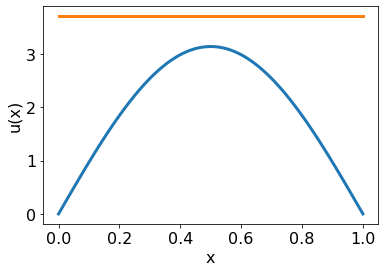

In [14]:
def NLBVP(p,guess,iterations):
    """Solve u''(x) + u(x)**p = 0 with u(0) = u(1) = 0 using 2nd-order accurate␣
    ,→finite-differences.
    Parameters
    ----------
    p: positive exponent parameter.
    guess: numpy array with the inital guess for Newton's method.
    iterations: integer number of Newton iterations.
    """
    n = len(guess)
    ### PUT YOUR CODE BELOW THIS LINE ###
    A=np.zeros([n,n])
    A[2:,:-2]=-np.eye(n-2)
    A=A+A.T + 2*np.eye(n)
    A=-A/4*n**2
    A[0,2]=0
    A[-1,-3]=0
    print(A)
    guess=guess.reshape(n,1)
    for i in range(iterations):
        #guess[0,0]=0
        #guess[-1,0]=0
        guess=guess-np.linalg.inv(A+p*guess**(p-1))@(A@guess+guess**p)
    return guess

n = 100
x = np.linspace(0,1,n)
u = np.pi*np.sin(np.pi*x)
# u = NLBVP(3,u,10)


plt.plot(x,u,linewidth=3)
plt.plot(x,K_integral(10) + 0*x,linewidth=3)
plt.xlabel('x',fontsize=16)
plt.ylabel('u(x)',fontsize=16);
plt.tick_params(axis='both',labelsize=16)

In [15]:
def NLBVP1(p,guess,iterations):

    n = len(guess)
    ### PUT YOUR CODE BELOW THIS LINE ###


    return guess


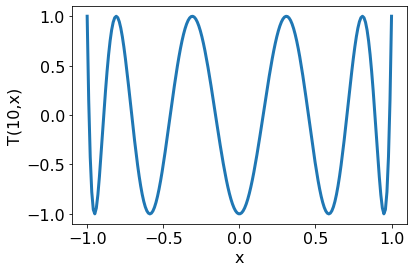

In [16]:
# def T(n,x):
#     global Tn
#     x_len = x.shape[0]
#     T0 = np.array([1]*x_len)
#     T1 = x
#
#     if n == 0:
#         return T0
#     if n == 1:
#         return T1
#
#     for i in range(2, n+1):
#         Tn = 2 * x * T1 - T0
#         T0 = T1
#         T1 = Tn
#     Tn = np.reshape(Tn, (x_len, 1))
#
#     return Tn
def T(n,x):

    ### PUT YOUR CODE BELOW THIS LINE ##

    tem = np.arccos(x)
    ans = np.cos(n * tem)

    return ans



x = np.linspace(-1,1,200)
n=10

plt.plot(x,T(n,x),linewidth=3)
plt.xlabel('x',fontsize=16)
plt.ylabel(f'T({n},x)',fontsize=16);
plt.tick_params(axis='both',labelsize=16);

In [17]:
# def Chebyshev_fit(degree,x,y):
#     deg = len(x) - 1
#     A = np.polynomial.chebyshev.chebvander(x, deg)
#     c_array = np.linalg.solve(A, y)
#
#     T_array = []
#     for i in range(degree + 1):
#         t = T(i, x)
#         t = np.reshape(t, (1,len(x)))
#         t = list(t[0])
#         T_array.append(t)
#     T_array = np.array(T_array)
#
#
#     c_degree = np.array(list(c_array)[:degree + 1])
#     c_degree_t = np.reshape(c_degree, (1, degree + 1))
#
#     z_array = np.dot(c_degree_t, T_array)
#
#     z_array = np.reshape(z_array, (len(x),1))
#     c_array = np.reshape(c_degree, (degree+1, 1))
#
#     return c_array, z_array
#
#
# x = np.linspace(-1,1,6)
# y = T(3,x)
#
# c, z = Chebyshev_fit(5,x,y)
# c[np.where(np.abs(c) < 1e-15)] = 0
# print(c)
# print()
#
#
# y = np.sin(3*x) + np.cos(5*x)
# c, z = Chebyshev_fit(10,x,y)
#
# y = np.array(list(y))
#
# plt.plot(x,y,linewidth=3)
# plt.plot(x,z,linewidth=3)
#
# plt.xlabel('x',fontsize=16)
# plt.ylabel('y',fontsize=16)
# plt.tick_params(axis='both',labelsize=16)

In [20]:


# def test_Chebyshev_fit(degree, x, y):
#     # might help
#     # k = np.arange(degree + 1)
#     # array([0, 1, 2, 3, 4, 5])
#     # M = T(k[None,:],x[:,None]) # Broadcasting
#     # print(M)
#     # L = np.average(M[:,:,None]*M[:,None,:],axis=0)
#
#     ###
#     d = degree + 1
#     c = np.ones(shape=(d,))
#     print("c:",c)
#     z = np.zeros(shape=(d,))
#     for n in range(10):
#         # 函数P
#         P = np.zeros(shape=(d,))
#         for k in range(degree+1):
#             P += c[k] * (T(k,x).reshape(degree+1,))
#         print("P:",P)
#         print("P - y:",P - y)
#         # 计算误差
#         Pi_sub_Yi = np.square(P - y)
#         # print("Pi_sub_Yi:",Pi_sub_Yi)
#         error = np.sum(np.abs(Pi_sub_Yi))
#         print(error)
#         if error < 1e-5:
#             break
#         # 更新 c
#         c = np.linalg.inv(np.dot(x.reshape(1,6).T,x.reshape(1,6)))
#         print("c:",c)
#         z = P
#     return c, z
#
#
# x = np.linspace(-1,1,6)
# y = T(3,x).reshape(6,)
#
# c, z = test_Chebyshev_fit(5,x,y)
# c[np.where(np.abs(c) < 1e-15)] = 0
# print(c)
# print()
#
#
# y = np.sin(3*x) + np.cos(5*x)
# c, z = Chebyshev_fit(10,x,y)
#
# y = np.array(list(y))
#
# plt.plot(x,y,linewidth=3)
# plt.plot(x,z,linewidth=3)
#
# plt.xlabel('x',fontsize=16)
# plt.ylabel('y',fontsize=16)
# plt.tick_params(axis='both',labelsize=16)

[0. 0. 0. 1. 0. 0.]



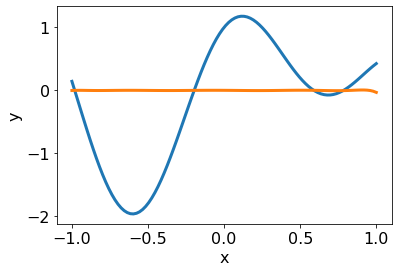

In [22]:
def Chebyshev_fit(degree,x,y):
    """Computes the least-squares Chebyshev polynomial model

        z = c[0]*T(0,x) + c[1]*T(1,x) + ... + c[degree]*T(degree,x)

        The function returns c, z.

    Parameters
    ----------
    degree: polynomial degree for fitting function.
    x: length-n numpy array of grid values
    y: length-n numpy array of function values.


    """
    # These might help.
    # You can comment them out if you prefer not to use them.

    k = np.arange(degree+1)

    M = T(k[None,:],x[:,None]) # Broadcasting

    L = np.average(M[:,:,None]*M[:,None,:],axis=0)

    ### PUT YOUR CODE BELOW THIS LINE ###
    A = np.polynomial.chebyshev.chebvander(x,degree)
    c = np.linalg.lstsq(A,y,rcond=None)[0]
    z = np.zeros(len(x))
    for ki in k:
        for zi in range(len(x)):
            z[zi] = np.sum(c[ki]*M[zi])

    return c,z

x = np.linspace(-1,1,100)
y = T(3,x)

c, z = Chebyshev_fit(5,x,y)
c[np.where(np.abs(c) < 1e-15)] = 0
print(c)
print()


y = np.sin(3*x) + np.cos(5*x)
c, z = Chebyshev_fit(10,x,y)

y = np.array(list(y))

plt.plot(x,y,linewidth=3)
plt.plot(x,z,linewidth=3)

plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.tick_params(axis='both',labelsize=16)